In [10]:
import json
import numpy
import matplotlib.pyplot as plt

In [11]:

def format(label):
    return f"{label:4f}"

# adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def bar_plot(result_file):
    with open(f"../results/{result_file}.json", "r") as file:
        results, output = json.loads(file.read()), f"results/{result_file}.png"
    x = numpy.arange(len(results["embeddings"]))  # the label locations
    width = 0.20  # the width of the bars

    _, ax = plt.subplots(layout='constrained')

    multiplier = 0
    for submission in results["submissions"]:
        offset = width * multiplier
        rects = ax.bar(x + offset, submission["scores"], width, label=str(submission["label"]))
        ax.bar_label(rects, padding=3, fmt=format, rotation="vertical")
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(results["y-axis"])
    ax.set_title(results["title"])
    ax.set_xticks(x, ["\n".join(label.split(" ")) for label in results["embeddings"]], rotation=45)
    ax.legend(loc="upper left", ncols=3)
    ax.set_ylim(0, max(max(submission["scores"]) for submission in results["submissions"]) * 1.5)

# Results

All results described in the paper and in the main notebook are compiled into a number of plots shown here. They can also be found in the results directory.

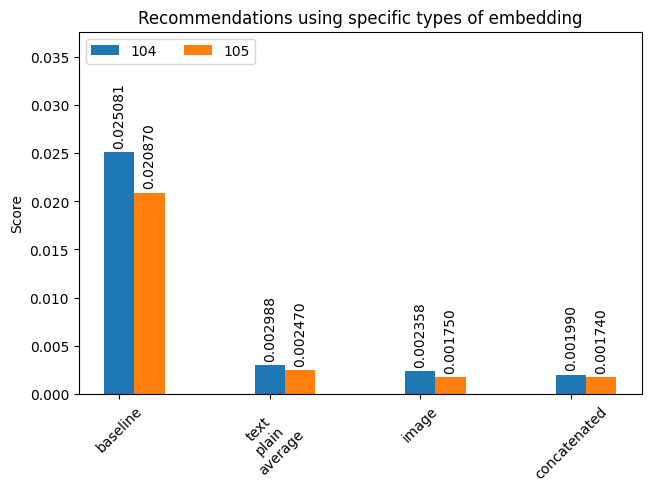

In [12]:
bar_plot("results")

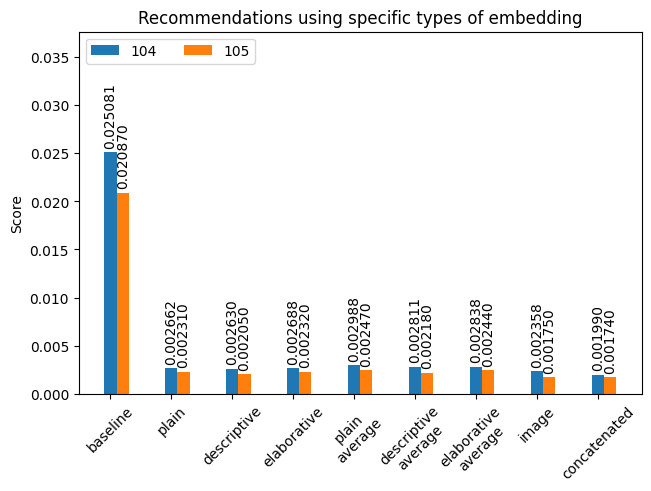

In [13]:
bar_plot("results-all")

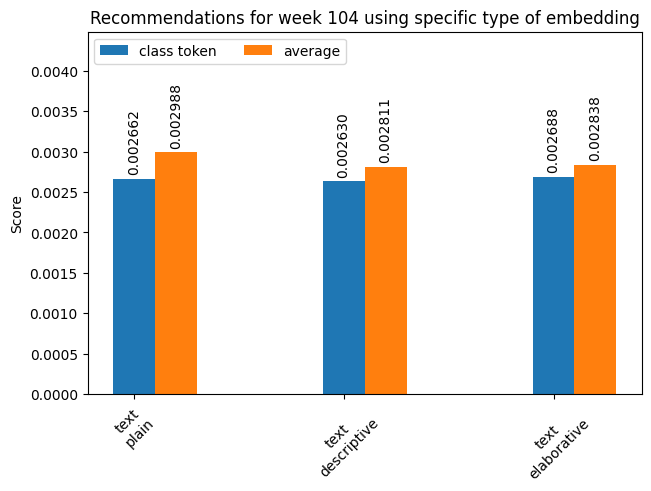

In [14]:
bar_plot("results-text-104")

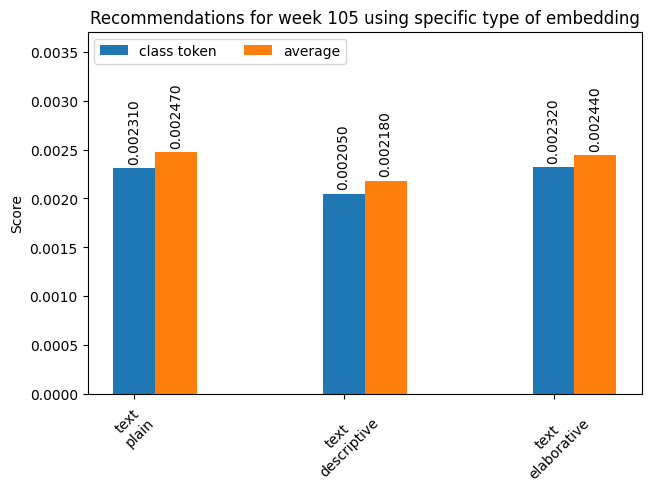

In [15]:
bar_plot("results-text-105")

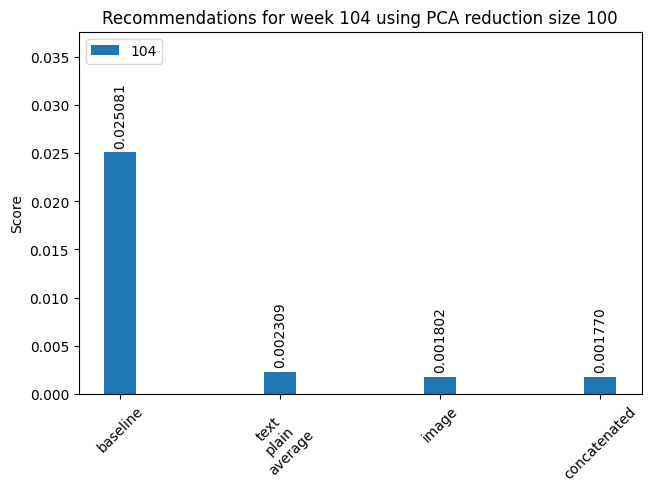

In [16]:
bar_plot("results-pca-100")

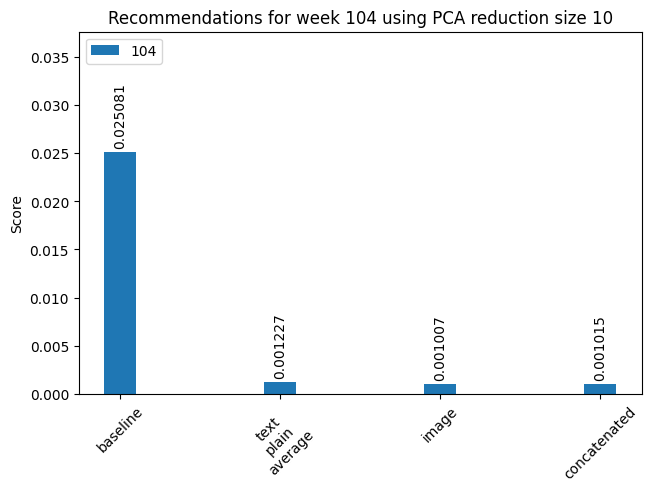

In [17]:
bar_plot("results-pca-10")

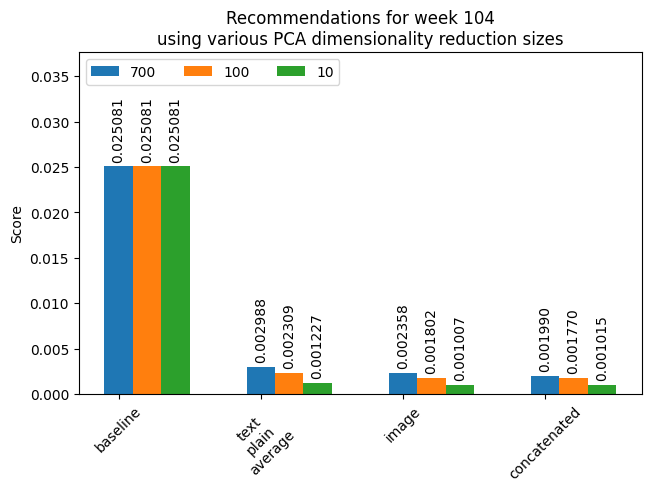

In [18]:
bar_plot("results-pca")

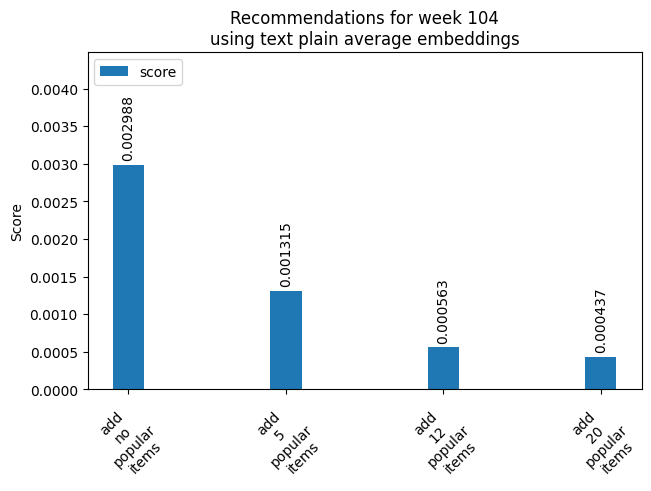

In [19]:
bar_plot("results-add-popular")

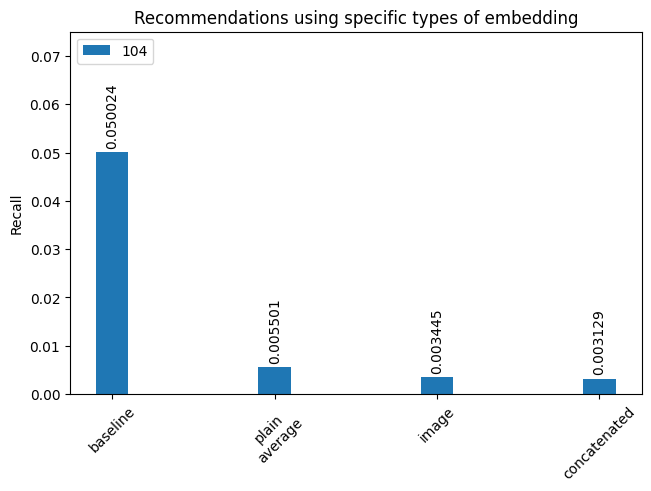

In [20]:
bar_plot("recall")

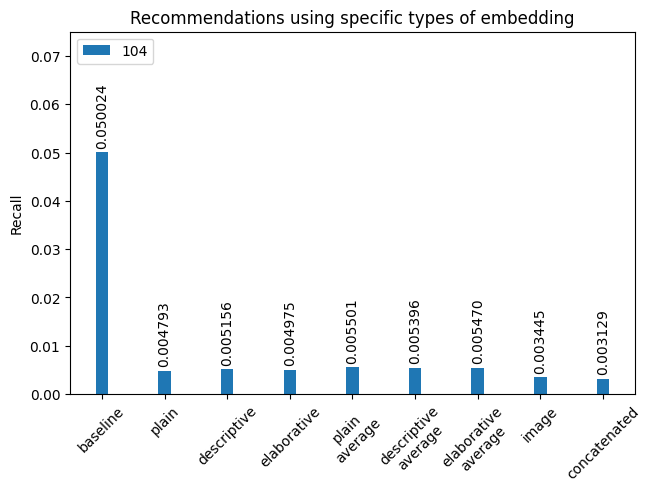

In [21]:
bar_plot("recall-all")

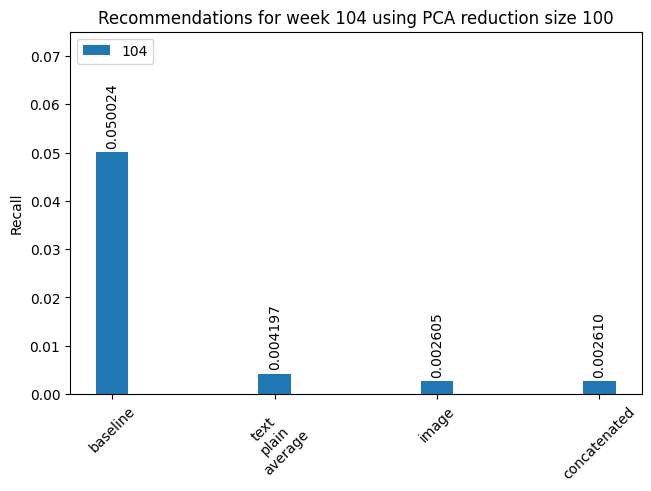

In [22]:
bar_plot("recall-pca-100")

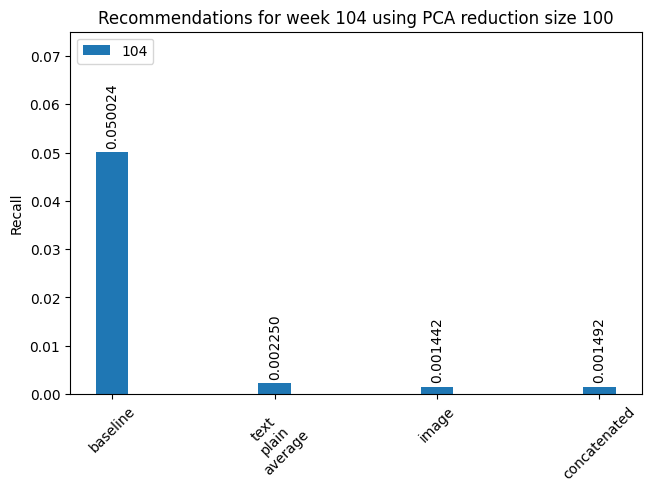

In [23]:
bar_plot("recall-pca-10")

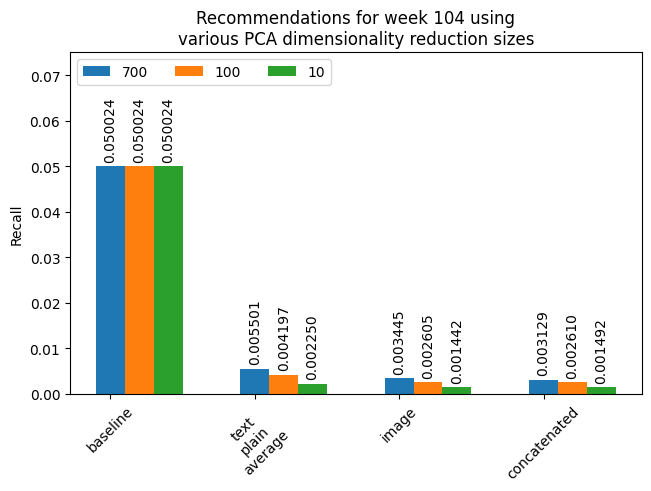

In [24]:
bar_plot("recall-pca")

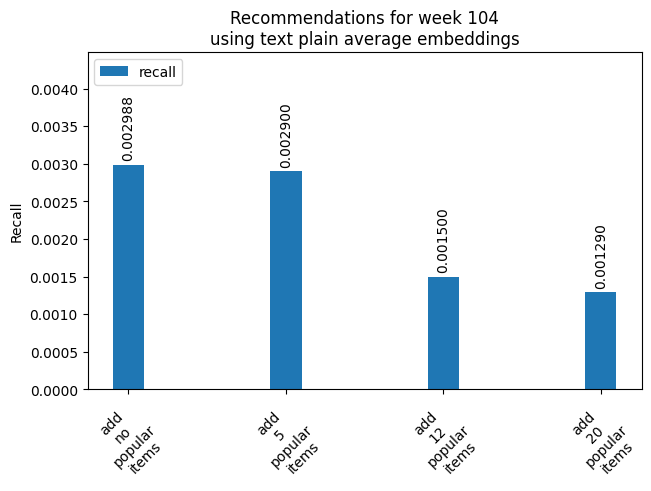

In [25]:
bar_plot("recall-add-popular")

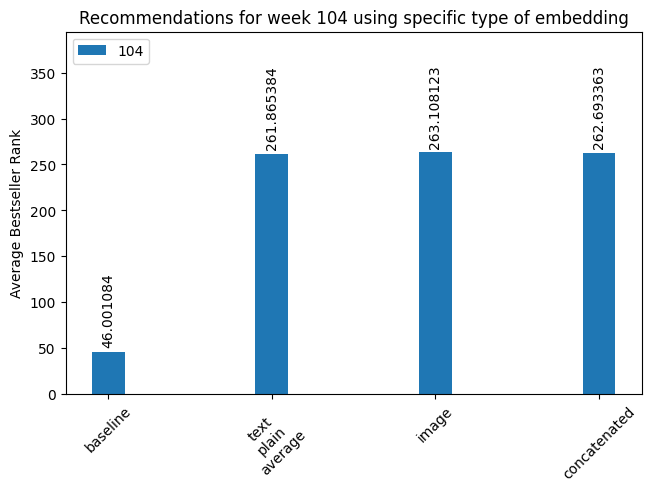

In [26]:
bar_plot("average-bestseller")

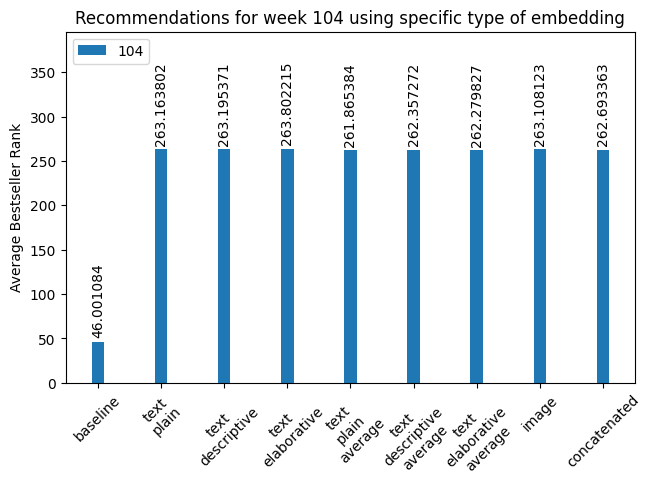

In [27]:
bar_plot("average-bestseller-all")

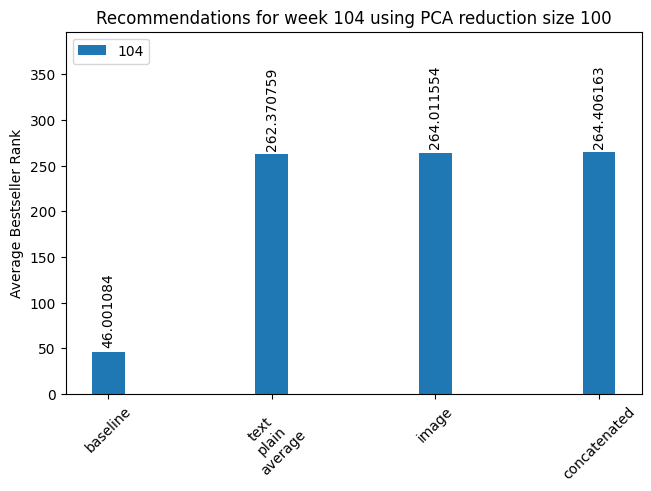

In [28]:
bar_plot("average-bestseller-pca-100")

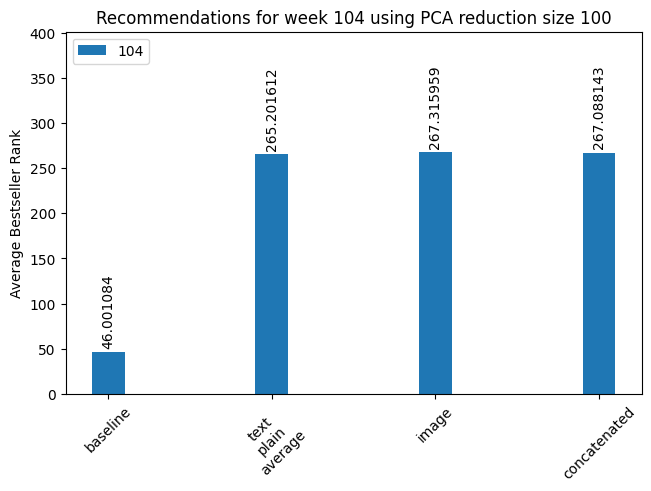

In [29]:
bar_plot("average-bestseller-pca-10")

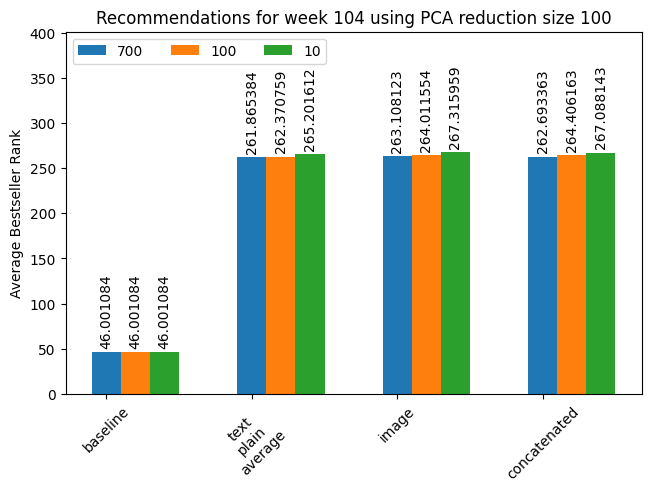

In [30]:
bar_plot("average-bestseller-pca")

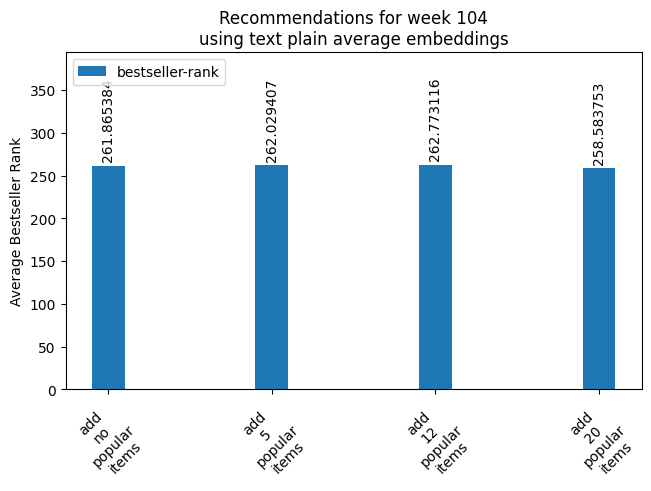

In [31]:
bar_plot("average-bestseller-add-popular")

# Cyclical weighting

In this plot we show the weighting scheme applied in the ranker centered on week 104.

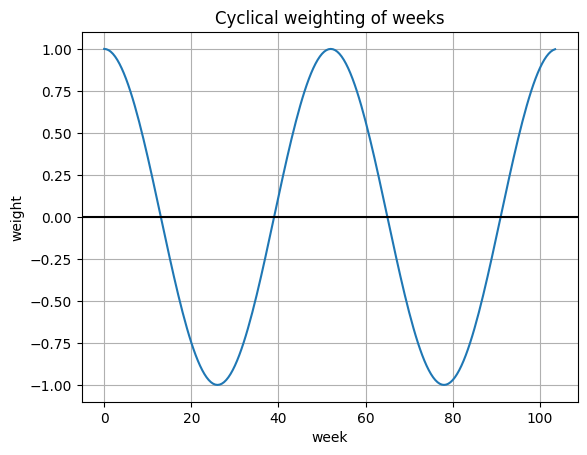

In [32]:

time = numpy.arange(0, 104, 0.5)
amplitude = numpy.cos(2 * numpy.pi / 52 * (time - 104))
plt.plot(time, amplitude)
plt.title("Cyclical weighting of weeks")
plt.xlabel("week")
plt.ylabel("weight")
plt.grid(True, which="both")
plt.axhline(y=0, color="k")